In [1]:
import ROOT
ROOT.gROOT.SetBatch()
ROOT.gSystem.Load("libpyjetty_TGlauberMC.dylib")

Welcome to JupyROOT 6.22/08


0

# Setup Glauber model with some default parameters

In [2]:
beamA = "Pb"
beamB = "Pb"
sigmaNN = 70 #mb
sigmaNNwidth = -1
bmin = 0
bmax = 20 #fm
mind = 0.4
tgmc = ROOT.TGlauberMC(beamA, beamB, sigmaNN, sigmaNNwidth)
tgmc.SetMinDistance(mind);
tgmc.SetBmin(bmin);
tgmc.SetBmax(bmax);

Setting up nucleus Pb
Setting up nucleus Pb


# Generate a single collision and return a dataframe with nucleons
- "isNuclA" marks from which one of the projectile or target the nucleon is (boolean)
- "isWounded" check if nucleon had at least one interaction
- "nColl" number of collisions for the nucleon
- "X", "Y", "Z" - position of the nucleon within the target or a projectile

In [3]:
import pandas as pd
def getEventCollisions():
    # get an event with at least one collision
    tgmc.Run(1)
    nucleons = tgmc.GetNucleons()
    print("impact parameter = ", tgmc.GetB(), "  Npart = ", tgmc.GetNpart())
    collisions = {'isNuclA' : [n.IsInNucleusA() for n in nucleons],
                  'isWounded': [n.IsWounded() for n in nucleons],
                  'nColl': [n.GetNColl() for n in nucleons],
                  'X': [n.GetX() for n in nucleons],
                  'Y': [n.GetY() for n in nucleons],
                  'Z': [n.GetY() for n in nucleons]}
    pd_collisions = pd.DataFrame.from_dict(collisions)
    return pd_collisions

... you can 'print' the data frame ...

In [4]:
print(getEventCollisions())

impact parameter =  7.590115547180176   Npart =  198
     isNuclA  isWounded  nColl         X         Y         Z
0       True       True      1 -3.122645 -3.907265 -3.907265
1       True       True      2 -2.983766  1.613540  1.613540
2       True       True      2 -3.382053  1.211718  1.211718
3       True       True      1 -4.716862  1.193392  1.193392
4       True       True      5 -1.861157  1.449811  1.449811
..       ...        ...    ...       ...       ...       ...
411    False      False      0  8.528902 -5.481648 -5.481648
412    False      False      0  4.389359 -1.638137 -1.638137
413    False       True     10 -0.432257  3.651629  3.651629
414    False       True     11 -0.310389 -0.549860 -0.549860
415    False      False      0  6.095649 -0.396814 -0.396814

[416 rows x 6 columns]


# Some plotting

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
from matplotlib import animation, rc
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 200em; }</style>"))

#import matplotlib.pyplot as plt
#plt.style.use('classic')
#%matplotlib inline

import seaborn as sns
sns.set()

In [6]:
pdcolls = getEventCollisions()

impact parameter =  11.028033256530762   Npart =  62


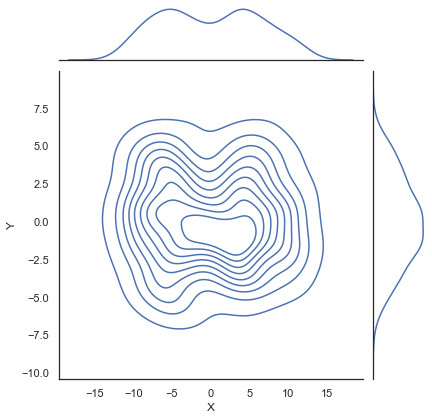

In [7]:
with sns.axes_style('white'):
    sns.jointplot(x="X", y="Y", data=pdcolls, kind='kde');

In [8]:
def colorNucleons(df, a=[1,0,0,0.5], b=[0,0,1,0.5], nw=[0.5,0.5,0.5,0.5]):
    colors = []
    for i in df.index:
        col = b
        if df["isNuclA"][i]:
            col = a
        if not df["isWounded"][i]:
            col = nw
        colors.append(col)
    return colors

def drawCollisionNucleons(dfnucleons):
    x = [x for x in dfnucleons["X"]]
    y = [y for y in dfnucleons["Y"]]
    # r = [1. * nsize * 4. for i in range(len(dfnucleons.index))]
    colors = colorNucleons(dfnucleons)
    
    maxxy = 20
    plt.figure(figsize=[maxxy, maxxy])
    ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(-maxxy, maxxy), ylim=(-maxxy, maxxy))
    points_radius = 1.2 * 72. * maxxy * 2.
    ax.scatter(x, y, c=colors, alpha=0.1, cmap="magma", s=points_radius)
    ax.set_facecolor('xkcd:white')

    # plt.figure()
    # plt.scatter(phis, ys, c=colors, s=zs_sized, alpha=0.4, cmap="PuOr") #cmap='viridis')
    # plt.scatter(phis, ys, c=cs, s=zs_sized, alpha=0.4, cmap="magma") #cmap='viridis')
    # plt.scatter(x, y, c=colors, s=r, alpha=0.1, cmap="magma") #cmap='viridis')
    
    plt.xlabel(r"$X$")
    plt.ylabel(r"$Y$")
    # plt.colorbar();  # show color scale
    plt.show()
    # plt.rcdefaults()

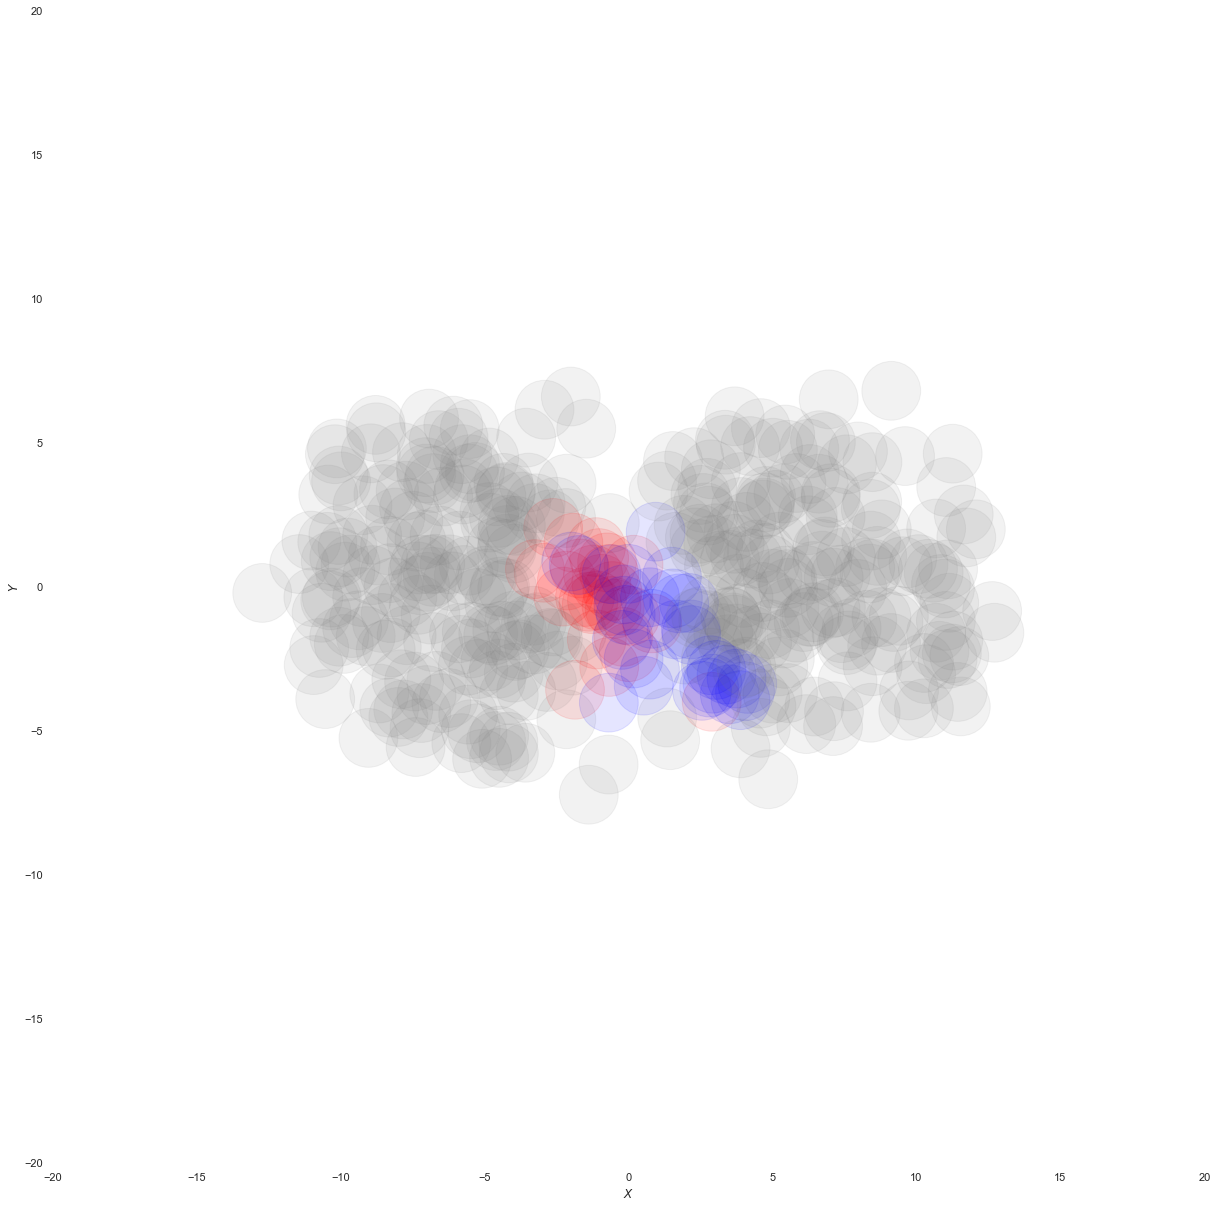

In [9]:
drawCollisionNucleons(pdcolls)

In [10]:
def drawCollisionNucleons3D(dfnucleons):
    x = [x for x in dfnucleons["X"]]
    y = [y for y in dfnucleons["Y"]]
    z = [z for z in dfnucleons["Z"]]
    colors = colorNucleons(dfnucleons)
    maxxy = 20
    plt.figure(figsize=[maxxy, maxxy])
    ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(-maxxy, maxxy), ylim=(-maxxy, maxxy), zlim=(-maxxy, maxxy), projection='3d')
    points_radius = 1.2 * 72. * maxxy * 2.
    ax.scatter3D(x, z, y, c=colors, alpha=0.1, cmap="magma", s=points_radius)
    ax.set_facecolor('xkcd:white')    
    plt.xlabel(r"$X$")
    plt.ylabel(r"$Z$")
    #plt.zlabel(r"$Z$")
    plt.show()

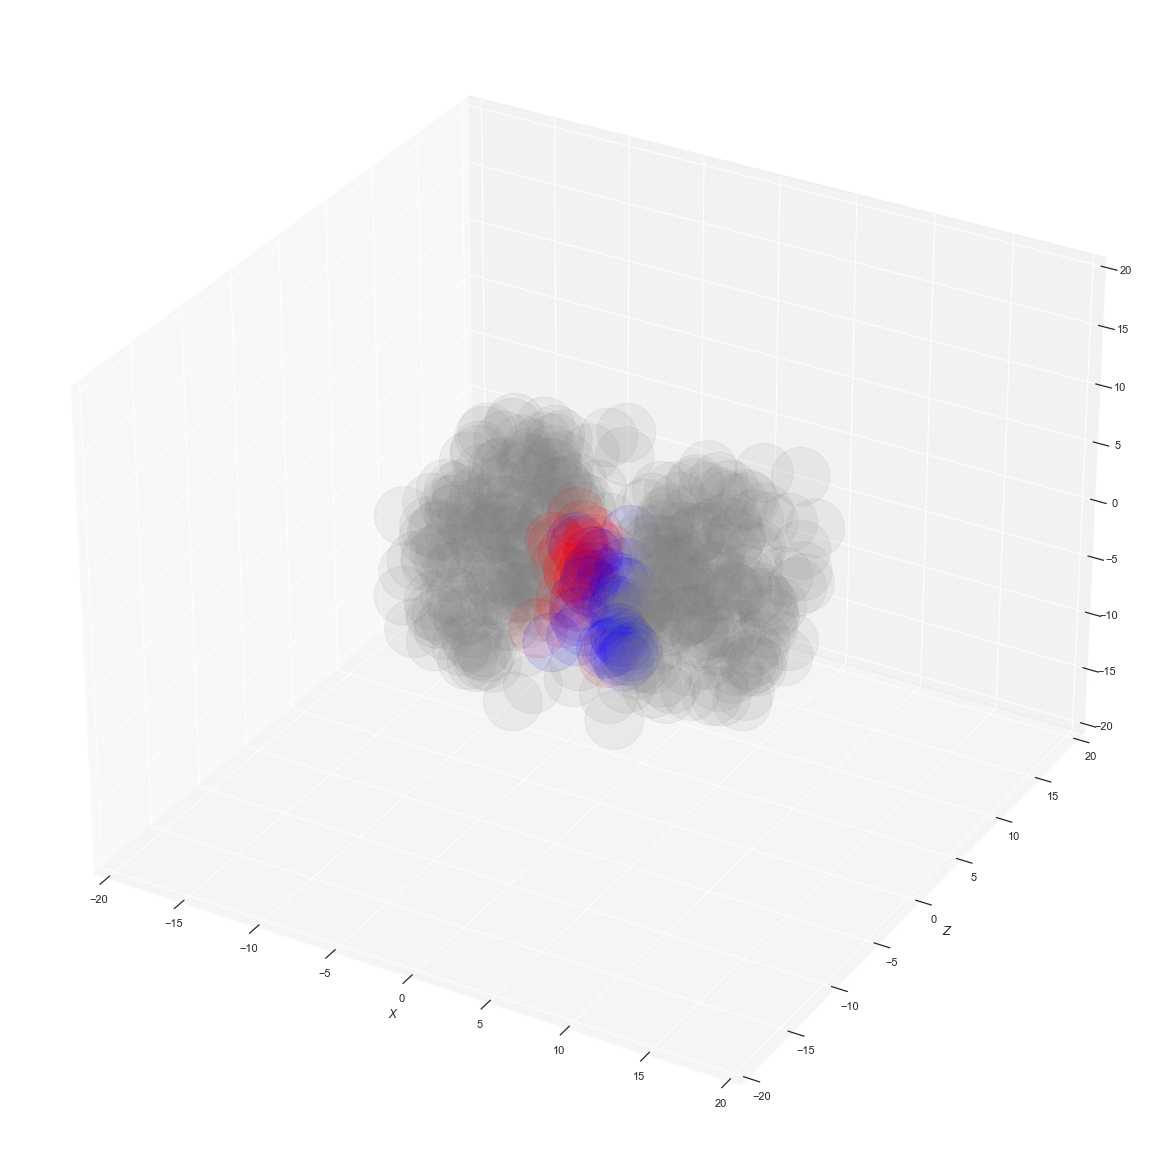

In [11]:
drawCollisionNucleons3D(pdcolls)

# Run some events and save ntuple to a file...

In [12]:
nEvents = 1000
ROOT.TGlauberMC_f.runAndSaveNtuple(n = nEvents, sysA = beamA, sysB = beamB, signn = sigmaNN, sigwidth = sigmaNNwidth, mind = mind, omega = -1, noded = -1, fname = "testGlauber.root")

Setting up nucleus Pb
Setting up nucleus Pb
Event # 900 x-sect = 7.86817 +- 0.262127 b        
Done!


In [13]:
%%bash
ls *.root

glauber_pythia_jets.root
gmc-PbPb-snn67.6-md0.4-nd-1.0-rc1-smax99.0.root
testGlauber.root
test_ang_ue.root


# Open the file, get the ntuple, plot ...

In [14]:
import uproot
file = uproot.open("testGlauber.root")
file.keys()

['nt_Pb_Pb;1']

In [15]:
nt = file['nt_Pb_Pb']

In [16]:
for b in nt:
    print(b)

<TBranch 'Npart' at 0x00013b933940>
<TBranch 'Ncoll' at 0x00013b933190>
<TBranch 'Nhard' at 0x00013b922970>
<TBranch 'B' at 0x00013b939460>
<TBranch 'BNN' at 0x00013b939c40>
<TBranch 'Ncollpp' at 0x00013b932bb0>
<TBranch 'Ncollpn' at 0x00013b9324f0>
<TBranch 'Ncollnn' at 0x00013b940340>
<TBranch 'VarX' at 0x00013b940b20>
<TBranch 'VarY' at 0x00013b946340>
<TBranch 'VarXY' at 0x00013b946b20>
<TBranch 'NpartA' at 0x00013b94c340>
<TBranch 'NpartB' at 0x00013b94cb20>
<TBranch 'Npart0' at 0x00013b952340>
<TBranch 'AreaW' at 0x00013b952b20>
<TBranch 'Psi1' at 0x00013b958340>
<TBranch 'Ecc1' at 0x00013b958b20>
<TBranch 'Psi2' at 0x00013b95d340>
<TBranch 'Ecc2' at 0x00013b95db20>
<TBranch 'Psi3' at 0x00013b962340>
<TBranch 'Ecc3' at 0x00013b962b20>
<TBranch 'Psi4' at 0x00013b967340>
<TBranch 'Ecc4' at 0x00013b967b20>
<TBranch 'Psi5' at 0x00013b96d340>
<TBranch 'Ecc5' at 0x00013b96db20>
<TBranch 'AreaO' at 0x00013b973340>
<TBranch 'AreaA' at 0x00013b973b20>
<TBranch 'X0' at 0x00013b979340>
<TBr

In [17]:
pdgmc = nt.arrays(library="pd")

In [18]:
pdgmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Npart        1000 non-null   float32
 1   Ncoll        1000 non-null   float32
 2   Nhard        1000 non-null   float32
 3   B            1000 non-null   float32
 4   BNN          1000 non-null   float32
 5   Ncollpp      1000 non-null   float32
 6   Ncollpn      1000 non-null   float32
 7   Ncollnn      1000 non-null   float32
 8   VarX         1000 non-null   float32
 9   VarY         1000 non-null   float32
 10  VarXY        1000 non-null   float32
 11  NpartA       1000 non-null   float32
 12  NpartB       1000 non-null   float32
 13  Npart0       1000 non-null   float32
 14  AreaW        1000 non-null   float32
 15  Psi1         1000 non-null   float32
 16  Ecc1         1000 non-null   float32
 17  Psi2         1000 non-null   float32
 18  Ecc2         1000 non-null   float32
 19  Psi3   

In [19]:
pdgmc.describe()

,Npart,Ncoll,Nhard,B,BNN,Ncollpp,Ncollpn,Ncollnn,VarX,VarY,...,MeanXSystem,MeanYSystem,MeanXA,MeanYA,MeanXB,MeanYB,PhiA,ThetaA,PhiB,ThetaB
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,111.845001,381.613007,248.197006,10.578736,1.028116,59.514000,182.524994,139.574005,3.215444,5.021981,...,1.201366e-08,-7.604196e-10,-5.289368,1.674247e-10,5.289368,-1.828032e-09,3.090547,1.587070,3.148485,1.565555
std,114.191772,513.185242,336.114410,3.725773,0.112646,81.122406,245.391586,189.085907,2.713196,3.077635,...,8.421546e-07,2.352354e-08,1.862886,3.272510e-08,1.862886,3.255287e-08,1.832511,0.691928,1.796387,0.691137
min,2.000000,1.000000,0.000000,0.774128,0.418204,0.000000,0.000000,0.000000,0.004148,0.000001,...,-3.628037e-06,-8.344753e-08,-9.121506,-1.242089e-07,0.387064,-1.640708e-07,0.001486,0.072377,0.006944,0.046585
25%,15.000000,16.000000,9.000000,8.101718,0.986170,2.000000,7.000000,5.000000,0.921170,2.416210,...,-4.616973e-07,-1.441370e-08,-6.813176,-1.643531e-08,4.050860,-1.990679e-08,1.545378,1.031752,1.627459,1.039633
50%,70.000000,131.000000,83.500000,11.063323,1.001661,19.500000,62.500000,47.000000,2.506030,5.305942,...,8.706374e-09,-8.565693e-10,-5.531662,2.992768e-10,5.531662,-3.824968e-10,3.083494,1.584609,3.105791,1.587651
75%,178.000000,563.500000,362.500000,13.626351,1.047828,88.250000,264.250000,202.000000,4.942401,7.548507,...,4.893789e-07,1.358837e-08,-4.050859,1.946043e-08,6.813175,1.676955e-08,4.664871,2.124388,4.731943,2.076299
max,405.000000,2153.000000,1445.000000,18.243015,1.485282,382.000000,1031.000000,774.000000,11.089515,12.838644,...,2.578245e-06,8.424323e-08,-0.387064,1.449928e-07,9.121505,1.170142e-07,6.280377,3.111014,6.280722,3.111190


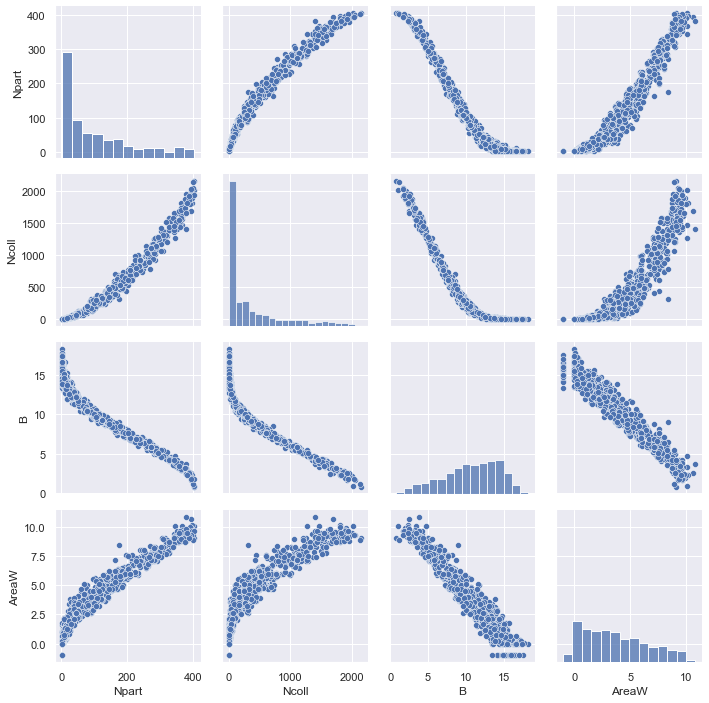

In [20]:
g = sns.PairGrid(pdgmc, vars=["Npart", "Ncoll", "B", "AreaW"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)